In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer(as_frame = True)
df = data.frame

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.shape

(569, 31)

In [ ]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X = df.drop('target', axis = 1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
columns = data.feature_names

In [ ]:
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)

#Without PCA Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
logistic = LogisticRegression()
gbc = GradientBoostingClassifier()

In [ ]:
logistic.fit(X_train, y_train)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Logistic Regression")

y_pred_logistic = logistic.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_logistic))
print("Classification Report: \n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_logistic))

print("------------------------------")
print("Gradient Boosting")
y_pred_gbc = gbc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_gbc))
print("Classification Report: \n", classification_report(y_test, y_pred_gbc))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_gbc))

Logistic Regression
Accuracy:  0.9473684210526315
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix: 
 [[34  5]
 [ 1 74]]
------------------------------
Gradient Boosting
Accuracy:  0.956140350877193
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        39
           1       0.95      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix: 
 [[35  4]
 [ 1 74]]


# With PCA Training

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 4)

In [ ]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca = pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
X_test_pca = pd.DataFrame(X_test_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [ ]:
X_train_pca

,PC1,PC2,PC3,PC4
0,3.622038,-1.868782,-1.738668,-0.454022
1,0.241861,3.448389,-0.016472,1.425944
2,3.972230,0.810955,-1.015291,-0.077998
3,-2.904087,0.248732,-1.320203,-1.778156
4,-1.366459,0.862839,3.082906,-1.319055
...,...,...,...,...
450,3.118982,-1.579959,0.067878,-0.491888
451,1.124494,0.262305,-3.879882,0.669467
452,3.939327,-0.285650,1.374226,-0.710169
453,-2.366661,-1.046686,-1.023462,-1.358265


In [ ]:
logistic.fit(X_train_pca, y_train)
gbc.fit(X_train_pca, y_train)

GradientBoostingClassifier()

In [ ]:
print("Logistic Regression")

y_pred_logistic = logistic.predict(X_test_pca)
print("Accuracy: ", accuracy_score(y_test, y_pred_logistic))
print("Classification Report: \n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_logistic))

print("------------------------------")
print("Gradient Boosting")
y_pred_gbc = gbc.predict(X_test_pca)
print("Accuracy: ", accuracy_score(y_test, y_pred_gbc))
print("Classification Report: \n", classification_report(y_test, y_pred_gbc))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_gbc))

Logistic Regression
Accuracy:  0.9298245614035088
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.94      0.96      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix: 
 [[34  5]
 [ 3 72]]
------------------------------
Gradient Boosting
Accuracy:  0.9035087719298246
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.92      0.93      0.93        75

    accuracy                           0.90       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114

Confusion Matrix: 
 [[33  6]
 [ 5 70]]


#Visual

In [ ]:
X = df.drop("target", axis = 1)

In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
X = pca.fit_transform(X)

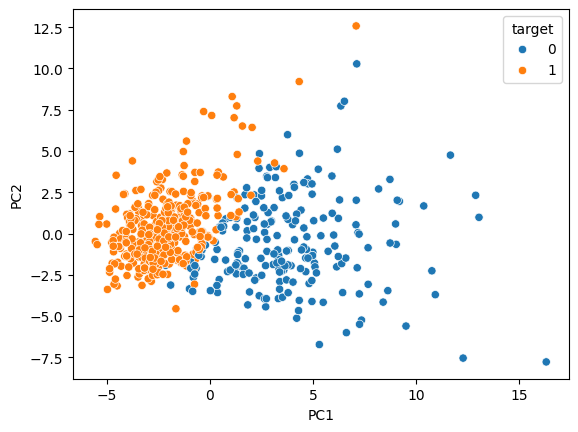

In [ ]:
X = pd.DataFrame(X, columns = ['PC1', 'PC2'])
sns.scatterplot(data = X, x = "PC1", y = "PC2", hue= df["target"])
plt.show()